In [64]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

In [65]:
data_file_name = './data2.txt'
data = np.loadtxt(data_file_name, delimiter = ',')
data = np.array(data)

In [66]:
length_of_data = len(data)

def createNumpyArray(variable, length, location_of_data):
    for i in range (0, length):
        variable.append([data[i][location_of_data]])
    variable = np.array(variable)
    return variable

x = []
x = createNumpyArray(x, length_of_data, 0)

y = []
y = createNumpyArray(y, length_of_data, 1)

Part 1: Plot the data

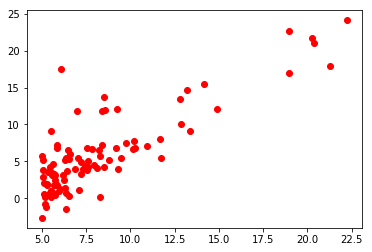

In [67]:
plt.plot(x,y, 'ro')
plt.show()

Part 2: Normal Equation

In [68]:
X_b = np.c_[np.ones((length_of_data,1)), x] #add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best = np.flip(theta_best)

normal_equation = np.poly1d(theta_best.flatten())
print(normal_equation)

 
1.193 x - 3.896


Part 3: Gradient Descent (batch mode), Part a

In [69]:
def gradient_descent_batch(eta, n_iterations, m, theta):
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
    return theta

def findYValues(x_values, polynomial):
    return polynomial(x_values)

def findMSE(y_true, y_predicted):
    return np.square(np.subtract(y_true, y_predicted)).mean()

m = length_of_data
eta = 0.01 #learning rate

In [70]:
# Trial 1

n_iterations1 = 10

theta = np.random.randn(2,1) #random initialization

theta = np.flip(gradient_descent_batch(eta, n_iterations1, m, theta))

gradient_descent_batch_equation = np.poly1d((theta).flatten())

batch_MSE1 = findMSE(y, findYValues(x, gradient_descent_batch_equation))

print(gradient_descent_batch_equation)

 
0.7131 x + 0.7982


In [71]:
# Trial 2

n_iterations2 = 100

theta = np.random.randn(2,1) #random initialization

theta = np.flip(gradient_descent_batch(eta, n_iterations2, m, theta))

gradient_descent_batch_equation = np.poly1d((theta).flatten())

batch_MSE2 = findMSE(y, findYValues(x, gradient_descent_batch_equation))

print(gradient_descent_batch_equation)

 
0.9814 x - 1.789


In [72]:
# Trial 3

n_iterations3 = 1000

theta = np.random.randn(2,1) #random initialization

theta = np.flip(gradient_descent_batch(eta, n_iterations3, m, theta))

gradient_descent_batch_equation = np.poly1d((theta).flatten())

batch_MSE3 = findMSE(y, findYValues(x, gradient_descent_batch_equation))

print(gradient_descent_batch_equation)

 
1.186 x - 3.826


In [73]:
# Trial 4

n_iterations4 = 10000

theta = np.random.randn(2,1) #random initialization

theta = np.flip(gradient_descent_batch(eta, n_iterations4, m, theta))

gradient_descent_batch_equation = np.poly1d((theta).flatten())

batch_MSE4 = findMSE(y, findYValues(x, gradient_descent_batch_equation))

print(gradient_descent_batch_equation)

 
1.193 x - 3.896


In [74]:
# Trial 5
n_iterations5 = 100000

theta = np.random.randn(2,1) #random initialization

theta = np.flip(gradient_descent_batch(eta, n_iterations5, m, theta))

gradient_descent_batch_equation = np.poly1d((theta).flatten())

batch_MSE5 = findMSE(y, findYValues(x, gradient_descent_batch_equation))

print(gradient_descent_batch_equation)

 
1.193 x - 3.896


A termination condition of 10000 iterations seems appropriate since the equation found is the same as the normal equation but is less than 100000 iterations, which also finds the same equation as the normal equation.

Part 3: Gradient Descent (batch mode), Part b

In [75]:
batch_iterations = [n_iterations1, n_iterations2, n_iterations3, n_iterations4, n_iterations5]
batch_MSE = [batch_MSE1, batch_MSE2, batch_MSE3, batch_MSE4, batch_MSE5]

print("Iterations: ")
print(batch_iterations)
print("MSE: ")
print(batch_MSE)

Iterations: 
[10, 100, 1000, 10000, 100000]
MSE: 
[12.972875475187251, 9.761850124513185, 8.95483950963055, 8.953942751950358, 8.953942751950358]


As the iterations go up, the cost goes down. Therefore, the more iterations, the more accurate. However, there is a point at which you do not need to add more iterations, since the change in cost gets more minimal as the interations go up. The speed of convergence occurs quite slowly for large training sets for batch gradient descent since the whole batch of traning data is used at every step. 

Cost vs. Iterations

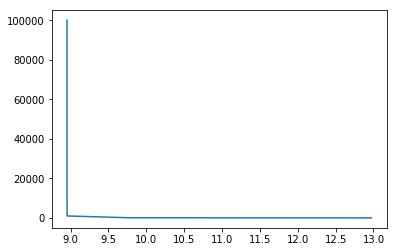

In [76]:
plt.plot(batch_MSE, batch_iterations)
plt.show()

Part 3: Gradient Descent (batch mode), Part c

In [77]:
n_iterations = 10000

In [78]:
#Trial 1

eta1 = 0.000001 #learning rate

theta = np.random.randn(2,1) #random initialization

theta = np.flip(gradient_descent_batch(eta1, n_iterations, m, theta))

gradient_descent_batch_equation = np.poly1d((theta).flatten())

batch_MSE1 = findMSE(y, findYValues(x, gradient_descent_batch_equation))

print(gradient_descent_batch_equation)

 
0.4194 x + 1.546


In [79]:
#Trial 2

eta2 = 0.00001 #learning rate

theta = np.random.randn(2,1) #random initialization

theta = np.flip(gradient_descent_batch(eta2, n_iterations, m, theta))

gradient_descent_batch_equation = np.poly1d((theta).flatten())

batch_MSE2 = findMSE(y, findYValues(x, gradient_descent_batch_equation))

print(gradient_descent_batch_equation)

 
1.001 x - 1.981


In [80]:
#Trial 3

eta3 = 0.0001 #learning rate

theta = np.random.randn(2,1) #random initialization

theta = np.flip(gradient_descent_batch(eta3, n_iterations, m, theta))

gradient_descent_batch_equation = np.poly1d((theta).flatten())

batch_MSE3 = findMSE(y, findYValues(x, gradient_descent_batch_equation))

print(gradient_descent_batch_equation)

 
0.9893 x - 1.868


In [81]:
#Trial 4

eta4 = 0.001 #learning rate

theta = np.random.randn(2,1) #random initialization

theta = np.flip(gradient_descent_batch(eta4, n_iterations, m, theta))

gradient_descent_batch_equation = np.poly1d((theta).flatten())

batch_MSE4 = findMSE(y, findYValues(x, gradient_descent_batch_equation))

print(gradient_descent_batch_equation)

 
1.186 x - 3.826


In [82]:
#Trial 5

eta5 = 0.01 #learning rate

theta = np.random.randn(2,1) #random initialization

theta = np.flip(gradient_descent_batch(eta5, n_iterations, m, theta))

gradient_descent_batch_equation = np.poly1d((theta).flatten())

batch_MSE5 = findMSE(y, findYValues(x, gradient_descent_batch_equation))

print(gradient_descent_batch_equation)

 
1.193 x - 3.896


In [83]:
batch_learning_rate = [eta1, eta2, eta3, eta4, eta5]
batch_MSE = [batch_MSE1, batch_MSE2, batch_MSE3, batch_MSE4, batch_MSE5]

print("Learning Rate: ")
print(batch_learning_rate)
print("MSE: ")
print(batch_MSE)

Learning Rate: 
[1e-06, 1e-05, 0.0001, 0.001, 0.01]
MSE: 
[18.582853827073784, 9.62152971756869, 9.702907586281341, 8.954838418151184, 8.953942751950358]


The best learning rate seems to be 0.001, since it is one of the lowest  costs. 0.01 has a lower cost, however the change is minimal.

Cost vs. Learning Rate

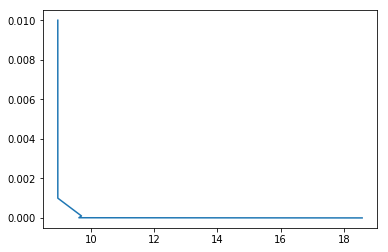

In [84]:
plt.plot(batch_MSE, batch_learning_rate)
plt.show()

Part 3: Gradient Descent (stochastic mode), Part a

In [85]:
def gradient_descent_stochastic(n_epochs, eta, theta):
    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - eta * gradients
    return theta

eta = 0.01 #learning rate

In [86]:
# Trial 1

n_epochs1 = 10
theta = np.random.randn(2,1) # random initilization

theta = np.flip(gradient_descent_stochastic(n_epochs1, eta, theta))

gradient_descent_stochastic_equation = np.poly1d((theta).flatten())

stochastic_MSE1 = findMSE(y, findYValues(x, gradient_descent_stochastic_equation))

print(gradient_descent_stochastic_equation)

 
1.357 x - 2.707


In [87]:
# Trial 2

n_epochs2 = 50
theta = np.random.randn(2,1) # random initilization

theta = np.flip(gradient_descent_stochastic(n_epochs2, eta, theta))

gradient_descent_stochastic_equation = np.poly1d((theta).flatten())

stochastic_MSE2 = findMSE(y, findYValues(x, gradient_descent_stochastic_equation))

print(gradient_descent_stochastic_equation)

 
-0.6407 x + 6


In [88]:
#Trial 3

n_epochs3 = 100
theta = np.random.randn(2,1) # random initilization

theta = np.flip(gradient_descent_stochastic(n_epochs3, eta, theta))

gradient_descent_stochastic_equation = np.poly1d((theta).flatten())

stochastic_MSE3 = findMSE(y, findYValues(x, gradient_descent_stochastic_equation))

print(gradient_descent_stochastic_equation)

 
1.085 x - 3.881


In [89]:
#Trial 4

n_epochs4 = 150
theta = np.random.randn(2,1) # random initilization

theta = np.flip(gradient_descent_stochastic(n_epochs4, eta, theta))

gradient_descent_stochastic_equation = np.poly1d((theta).flatten())

stochastic_MSE4 = findMSE(y, findYValues(x, gradient_descent_stochastic_equation))

print(gradient_descent_stochastic_equation)

 
0.4994 x - 1.592


In [90]:
#Trial 5

n_epochs5 = 200
theta = np.random.randn(2,1) # random initilization

theta = np.flip(gradient_descent_stochastic(n_epochs5, eta, theta))

gradient_descent_stochastic_equation = np.poly1d((theta).flatten())

stochastic_MSE5 = findMSE(y, findYValues(x, gradient_descent_stochastic_equation))

print(gradient_descent_stochastic_equation)

 
1.078 x - 4.648


An appropriate termination condition seems to be epochs of 100 since it results in an equation that is closest to the normal equation.

Part 3: Gradient Descent (stochastic mode), Part b

In [94]:
stochastic_epochs = [n_epochs1, n_epochs2, n_epochs3, n_epochs4, n_epochs5]
stochastic_MSE = [stochastic_MSE1, stochastic_MSE2, stochastic_MSE3, stochastic_MSE4, stochastic_MSE5]

print("Epochs: ")
print(stochastic_epochs)
print("MSE: ")
print(stochastic_MSE)

Epochs: 
[10, 50, 100, 150, 200]
MSE: 
[15.735522194398943, 84.46564564789286, 9.872977860711021, 27.3474291263488, 11.998628338381701]


Cost vs. Epochs. 

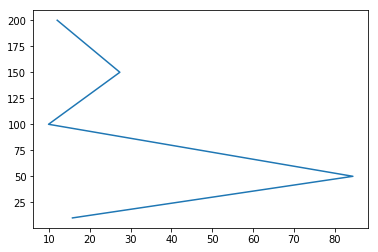

In [95]:
plt.plot(stochastic_MSE, stochastic_epochs)
plt.show()

Stochastic gradient descent picks a random instance in the trainng set at every step and computes the gradients based only on a single instance. Therefore, the speed of convergence can occur much faster since it has very little data to manipulate at every iteration. However, stochastic gradient descent can be less accurate, instead of gently decreasing until it reaches a minimum like in batch mode. The cost function will bounce up and down, decreasing only on average. 

Part 3: Gradient Descent (stochastic mode), Part c

In [96]:
n_epochs = 100

In [97]:
#Trial 1

eta1 = 0.000001
theta = np.random.randn(2,1) # random initilization

theta = np.flip(gradient_descent_stochastic(n_epochs, eta1, theta))

gradient_descent_stochastic_equation = np.poly1d((theta).flatten())

stochastic_MSE1 = findMSE(y, findYValues(x, gradient_descent_stochastic_equation))

print(gradient_descent_stochastic_equation)

 
0.2904 x + 0.6343


In [98]:
#Trial 2

eta2 = 0.00001
theta = np.random.randn(2,1) # random initilization

theta = np.flip(gradient_descent_stochastic(n_epochs, eta2, theta))

gradient_descent_stochastic_equation = np.poly1d((theta).flatten())

stochastic_MSE2 = findMSE(y, findYValues(x, gradient_descent_stochastic_equation))

print(gradient_descent_stochastic_equation)

 
0.8321 x - 0.1758


In [99]:
#Trial 3

eta3 = 0.0001
theta = np.random.randn(2,1) # random initilization

theta = np.flip(gradient_descent_stochastic(n_epochs, eta3, theta))

gradient_descent_stochastic_equation = np.poly1d((theta).flatten())

stochastic_MSE3 = findMSE(y, findYValues(x, gradient_descent_stochastic_equation))

print(gradient_descent_stochastic_equation)

 
0.9275 x - 1.571


In [100]:
#Trial 4

eta4 = 0.001
theta = np.random.randn(2,1) # random initilization

theta = np.flip(gradient_descent_stochastic(n_epochs, eta4, theta))

gradient_descent_stochastic_equation = np.poly1d((theta).flatten())

stochastic_MSE4 = findMSE(y, findYValues(x, gradient_descent_stochastic_equation))

print(gradient_descent_stochastic_equation)

 
1.432 x - 3.498


In [101]:
#Trial 5

eta5 = 0.01
theta = np.random.randn(2,1) # random initilization

theta = np.flip(gradient_descent_stochastic(n_epochs, eta5, theta))

gradient_descent_stochastic_equation = np.poly1d((theta).flatten())

stochastic_MSE5 = findMSE(y, findYValues(x, gradient_descent_stochastic_equation))

print(gradient_descent_stochastic_equation)

 
1.373 x - 6.822


In [102]:
stochastic_learning_rate = [eta1, eta2, eta3, eta4, eta5]
stochastic_MSE = [stochastic_MSE1, stochastic_MSE2, stochastic_MSE3, stochastic_MSE4, stochastic_MSE5]

print("Learning Rate: ")
print(stochastic_learning_rate)
print("MSE: ")
print(stochastic_MSE)

Learning Rate: 
[1e-06, 1e-05, 0.0001, 0.001, 0.01]
MSE: 
[29.06961791136853, 11.48507848762231, 10.02377137069991, 15.3162198861788, 11.557851741174362]


Cost vs Learning Rate.

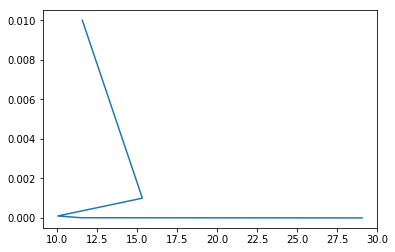

In [103]:
plt.plot(stochastic_MSE, stochastic_learning_rate)
plt.show()

The best learning rate seems to be 0.0001 since it has the lowest cost. 